In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
ctc = sc.read_h5ad('/mnt/c/Users/ouyangkang/Desktop/ctc_with_anno.h5ad')

In [3]:
sample_info_mapping = {
    "C03427D3": "Sample_01",
    "C03427D4": "Sample_02",
    "A04086G2": "Sample_03",
    "A04230E4_15": "Sample_04",
    "A04088E3": "Sample_05",
    "A04086G3": "Sample_06",
    "A04227C4_13": "Sample_07",
    "A04228A4_1": "Sample_08",
    "A04227C4_14": "Sample_09",
    "A04230E4_16": "Sample_10",
    "A04229A3": "Sample_11",
    "A04232A3": "Sample_12",
    "Y00784ME_1": "Sample_13",
    "A04230E2": "Sample_14",
    "Y00723F2_1": "Sample_15",
    "Y00723F2_2": "Sample_16",
    "Y00784ME_2": "Sample_17",
    "A04224E3": "Sample_18"
}
ctc.obs['sample_info'] = ctc.obs['chip_id'].replace(sample_info_mapping)

/tmp/ipykernel_26642/3398937030.py:21: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ctc.obs['sample_info'] = ctc.obs['chip_id'].replace(sample_info_mapping)


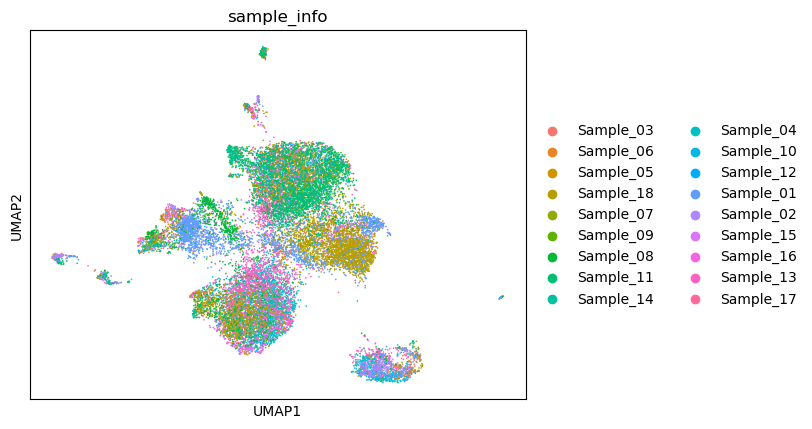

In [15]:
chip_color = {
    "Sample_03": "#F8766D",
    "Sample_06": "#E88526",
    "Sample_05": "#D39200",
    "Sample_18": "#B79F00",
    "Sample_07": "#93AA00",
    "Sample_09": "#5EB300", 
    "Sample_08": "#00BA38",
    "Sample_11": "#00BF74",
    "Sample_14": "#00C19F",
    "Sample_04": "#00BFC4",
    "Sample_10": "#00B9E3",
    "Sample_12": "#00ADFA",
    "Sample_01": "#619CFF",
    "Sample_02": "#AE87FF",
    "Sample_15": "#DB72FB",
    "Sample_16": "#F564E3", 
    "Sample_13": "#FF61C3",
    "Sample_17": "#FF699C"
}

sc.pl.umap(ctc, color='sample_info', palette=chip_color, show=False)
plt.savefig('/mnt/d/dailywork/02_ctc/plot/figs/ctc_batch_correct.pdf', dpi=300, bbox_inches='tight')

In [4]:
phage_mapping = {
    "None": "Healthy"
}

ctc.obs['phage_info'] = ctc.obs['phage_info'].replace(phage_mapping)

/tmp/ipykernel_26642/828191767.py:5: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  ctc.obs['phage_info'] = ctc.obs['phage_info'].replace(phage_mapping)


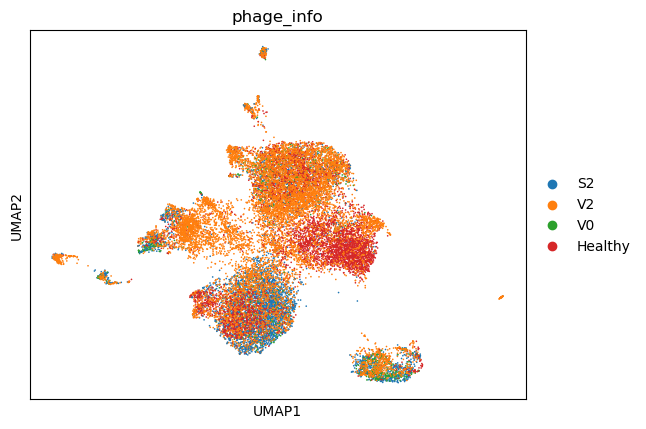

In [18]:
sc.pl.umap(ctc, color='phage_info', show=False)
plt.savefig('/mnt/d/dailywork/02_ctc/plot/figs/ctc_phage_distribution.pdf', dpi=300, bbox_inches='tight')

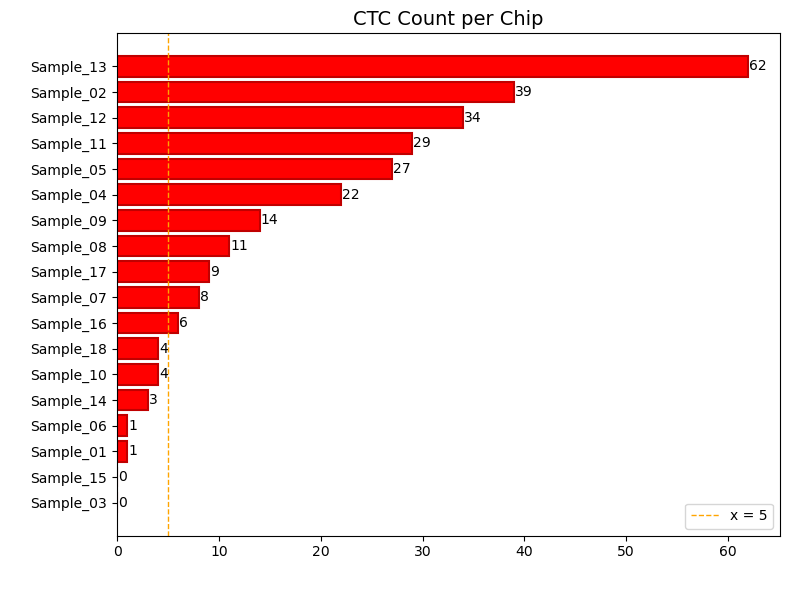

In [42]:
num_chip_df = pd.crosstab(ctc.obs['sample_info'], ctc.obs['anno_ctc'])
num_chip_df.sort_values(by='True CTC', ascending=True, inplace=True)

plt.figure(figsize=(8, 6))

fill_color = '#ff0000'
border_color = '#c00000'

ax = plt.barh(num_chip_df.index, num_chip_df['True CTC'], color=fill_color, edgecolor=border_color, linewidth=1.5)

# 添加参考线
plt.axvline(x=5, color='#ffa500', linestyle='--', linewidth=1, label='x = 5')

# 添加数值标签
for i, v in enumerate(num_chip_df['True CTC']):
    plt.text(v + 0.1, i, f"{v:.0f}", va='center')

# 美化坐标轴
plt.xlabel("CTC Count", fontsize=12, color='white')
plt.ylabel("Chip ID", fontsize=12, color='white')
plt.title("CTC Count per Chip", fontsize=14, color='black')

plt.grid(False)
# 添加标签、图例
plt.xlabel("CTC Count")
plt.ylabel("Chip ID")
plt.legend()
plt.tight_layout()
plt.savefig('/mnt/d/dailywork/02_ctc/plot/figs/ctc_count_by_chip.pdf', dpi=300, bbox_inches='tight')

In [5]:
num_chip_df = pd.crosstab(ctc.obs['sample_info'], ctc.obs['anno_ctc'])

In [7]:
num_chip_df.index.name = None
num_chip_df.columns.name = None

In [8]:
num_chip_df.head()

,B cell,Erythroid progenitor cell,False CTC,Monocyte,NK cell,Plasma cell,T cell,True CTC,pDC
Sample_03,13,0,0,15,15,167,10,0,11
Sample_06,55,2,0,60,22,19,2,1,3
Sample_05,2,0,2,15,5,0,0,27,10
Sample_18,879,0,11,198,1202,73,2298,4,9
Sample_07,27,0,2,24,53,3,9,8,20


In [10]:
phage_anno_df = pd.crosstab(ctc.obs['phage_info'], ctc.obs['anno_ctc'])
phage_anno_df.index.name = None
phage_anno_df.columns.name = None
phage_anno_df.head()

,B cell,Erythroid progenitor cell,False CTC,Monocyte,NK cell,Plasma cell,T cell,True CTC,pDC
S2,2939,2,15,327,761,659,160,73,140
V2,2072,44,47,1836,4334,579,1373,185,250
V0,135,0,5,103,384,254,17,12,28
Healthy,879,0,11,198,1202,73,2298,4,9


In [11]:
phage_anno_df.to_csv('/mnt/d/dailywork/02_ctc/plot/plot_data/phage_celltype_df.csv')
num_chip_df.to_csv('/mnt/d/dailywork/02_ctc/plot/plot_data/chip_celltype_df.csv')

In [12]:
ctc.obs['sample_info'].value_counts()

sample_info
Sample_18    4674
Sample_13    3761
Sample_04    3050
Sample_11    2580
Sample_01    2200
Sample_09    1062
Sample_08     846
Sample_10     792
Sample_02     783
Sample_17     273
Sample_14     271
Sample_16     241
Sample_15     235
Sample_03     231
Sample_06     164
Sample_07     146
Sample_05      61
Sample_12      38
Name: count, dtype: int64